In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# This lab is a continuation of the previous lab. So to see the solutions of this lab please scroll down.

**1. Import the necessary libraries if you are starting a new notebook. Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv**

**2. Find all of the categorical data. Save it in a categorical_df variable.**

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
#Define a function that will rename columns to PE8 style

def rename_columns(df):
    df2 = df.copy()#making a copy just to be safe
    df2.columns = df.columns.str.replace(" ", "_")
    df2 = df2.rename(columns=str.lower)
    return df2

In [5]:
customer_df = rename_columns(customer_df)
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
#change the column effective_to_date to daetime format
customer_df['effective_to_date'] =  pd.to_datetime(customer_df['effective_to_date'])

In [7]:
customer_df.nunique()

customer                         9134
state                               5
customer_lifetime_value          8041
response                            2
coverage                            3
education                           5
effective_to_date                  59
employmentstatus                    5
gender                              2
income                           5694
location_code                       3
marital_status                      3
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
policy_type                         3
policy                              9
renew_offer_type                    4
sales_channel                       4
total_claim_amount               5106
vehicle_class                       6
vehicle_size                        3
dtype: int64

In [8]:
customer_df['months_since_last_claim'].dtypes

dtype('int64')

In [9]:
#This function seperates the continuous and discrete variables
def count_disc_splitter(df):
    continuous_list = []
    discrete_list = []
    for col in df:
        if df[col].nunique() > 35 and df[col].dtypes != 'O':#with this condition of != 'O', I am getting rid of customer column
            continuous_list.append(col)
            continuous = df[continuous_list]
        elif df[col].nunique() <= 60:
            discrete_list.append(col)
            discrete = df[discrete_list]
        else:
            pass
    return continuous, discrete

In [10]:
numerical_df , categorical_df = count_disc_splitter(customer_df)

In [11]:
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,0,2,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,0,1,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,3,2,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,0,3,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [12]:
numerical_df

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,2011-02-24,56274,69,32,5,384.811147
1,6979.535903,2011-01-31,0,94,13,42,1131.464935
2,12887.431650,2011-02-19,48767,108,18,38,566.472247
3,7645.861827,2011-01-20,0,106,18,65,529.881344
4,2813.692575,2011-02-03,43836,73,12,44,138.130879
...,...,...,...,...,...,...,...
9129,23405.987980,2011-02-10,71941,73,18,89,198.234764
9130,3096.511217,2011-02-12,21604,79,14,28,379.200000
9131,8163.890428,2011-02-06,0,85,9,37,790.784983
9132,7524.442436,2011-02-03,21941,96,34,3,691.200000


**3.Check for NaN values.**

In [13]:
categorical_df.isna().sum()

state                        0
response                     0
coverage                     0
education                    0
employmentstatus             0
gender                       0
location_code                0
marital_status               0
number_of_open_complaints    0
number_of_policies           0
policy_type                  0
policy                       0
renew_offer_type             0
sales_channel                0
vehicle_class                0
vehicle_size                 0
dtype: int64

In [14]:
categorical_df.isnull().sum()

state                        0
response                     0
coverage                     0
education                    0
employmentstatus             0
gender                       0
location_code                0
marital_status               0
number_of_open_complaints    0
number_of_policies           0
policy_type                  0
policy                       0
renew_offer_type             0
sales_channel                0
vehicle_class                0
vehicle_size                 0
dtype: int64

There are no null values!

**4.Check all unique values of columns.**

In [15]:
print(categorical_df.apply(lambda col: col.unique()))

state                        [Washington, Arizona, Nevada, California, Oregon]
response                                                             [No, Yes]
coverage                                            [Basic, Extended, Premium]
education                    [Bachelor, College, Master, High School or Bel...
employmentstatus             [Employed, Unemployed, Medical Leave, Disabled...
gender                                                                  [F, M]
location_code                                         [Suburban, Rural, Urban]
marital_status                                     [Married, Single, Divorced]
number_of_open_complaints                                   [0, 2, 1, 3, 5, 4]
number_of_policies                                 [1, 8, 2, 7, 9, 4, 3, 6, 5]
policy_type                      [Corporate Auto, Personal Auto, Special Auto]
policy                       [Corporate L3, Personal L3, Corporate L2, Pers...
renew_offer_type                              [Offer

In [16]:
print(categorical_df.apply(lambda col: col.nunique()))

state                        5
response                     2
coverage                     3
education                    5
employmentstatus             5
gender                       2
location_code                3
marital_status               3
number_of_open_complaints    6
number_of_policies           9
policy_type                  3
policy                       9
renew_offer_type             4
sales_channel                4
vehicle_class                6
vehicle_size                 3
dtype: int64


**5.Check dtypes. Do they all make sense as categorical data?**

In [17]:
categorical_df.dtypes

state                        object
response                     object
coverage                     object
education                    object
employmentstatus             object
gender                       object
location_code                object
marital_status               object
number_of_open_complaints     int64
number_of_policies            int64
policy_type                  object
policy                       object
renew_offer_type             object
sales_channel                object
vehicle_class                object
vehicle_size                 object
dtype: object

To me they all make sense as categorical data! Even though policy_type and policy are integers, the number of unique values that they have can resemble groups/categories, there fore they are worth treating as categoricals. 

**6.Does any column contain alpha and numeric data? Decide how to clean it.**

I think the following values **[Offer1, Offer3, Offer2, Offer4]** in the **renew_offer_type** column are alphanumeric data. Maybe one possible way to clean it is by making them just numbers. For Offer1: 1, offer2: 2......and so. This will make label encoding much easier, as this has an order and now  is categorical ordinal. 

In [18]:

categorical_df['renew_offer_type'].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

In [19]:
#replacing renew_offer_type values with numeric values as it will be easier for encoding later on
categorical_df["renew_offer_type"].replace({"Offer1": 1, "Offer2": 2, "Offer3": 3, "Offer4": 4}, inplace=True)

C:\Users\ALP\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [20]:
categorical_df['renew_offer_type'].value_counts()

1    3752
2    2926
3    1432
4    1024
Name: renew_offer_type, dtype: int64

**7.Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.**

Most likely I would group some values together in categorical nominal data. As we apply onehotencoding to this, it will reduce the number of columns we have, if we group certain values together. 

- JustFor example the column state could be grouped into East coast and West coast. Or from seeing the value counts, maybe the states of Arizona, Nevada and Washington can be grouped togeter as they are quite low in counts compared to California and Oregon.

- Another example is thtat employmentstatus could be Employed, Unemployed or other. 

In [21]:
categorical_df['state'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

In [22]:
categorical_df['employmentstatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

**8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?**

In [23]:
categorical_df['policy_type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [24]:
categorical_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

They share similar information, the only difference is that policy is more specific, and policy_type is a bit more generalised. In my opinion havin the policy type is more important, as it will give us three clear groups, compared to multiple subgroups in policy column. I would drop the policy column and go for the policy type column. As it makes encoding much easier!

**9.Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.**

In [25]:
for col in categorical_df:
    print(categorical_df[col].value_counts())

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
F    4658
M    4476
Name: gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64
1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: numb

In [26]:
#Which column values would I combine:
#State, education, employmentstatus, number_of_open_complaints, number_of_policies, renew offer type, sales_channel, 
#vehicle_class

In [27]:
# State
# Grouped the smaller states together as other, this makes it more equal amongs the different states
categorical_df['state'] = list(map(lambda x: 'Other' if x in ['Arizona', 'Nevada', 'Washington'] else x, categorical_df['state']))
categorical_df['state'].value_counts()

C:\Users\ALP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Other         3383
California    3150
Oregon        2601
Name: state, dtype: int64

In [28]:
#education
#I grouped Bachelor, Master and Doctor into one called university degree (as the amount of Masters and Doctors were small)
categorical_df['education'] = list(map(lambda x: 'University Degree' if x in ['Bachelor', 'Master', 'Doctor'] else x, categorical_df['education']))
categorical_df['education'].value_counts()

C:\Users\ALP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


University Degree       3831
College                 2681
High School or Below    2622
Name: education, dtype: int64

In [29]:
#employmentstatus
#As employed is signicficantly higher, I will group all other values as other
categorical_df['employmentstatus'] = list(map(lambda x: 'Other' if x in ['Unemployed', 'Medical Leave', 'Disabled', 'Retired'] else x, categorical_df['employmentstatus']))
categorical_df['employmentstatus'].value_counts()

C:\Users\ALP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Employed    5698
Other       3436
Name: employmentstatus, dtype: int64

In [30]:
#Number of open complaints, 
#as Zero is significanly higher, I will group all the others together. THis may still not 
#help to deal with the class imbalcanc, but it doesnt make sense to do it any other way
categorical_df['number_of_open_complaints'] = list(map(lambda x: 'At least 1' if x in [1,2,3,4,5] else x, categorical_df['number_of_open_complaints']))
categorical_df['number_of_open_complaints'] = list(map(lambda x: 'None' if x in [0] else x, categorical_df['number_of_open_complaints']))
categorical_df['number_of_open_complaints'].value_counts()

C:\Users\ALP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\ALP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


None          7252
At least 1    1882
Name: number_of_open_complaints, dtype: int64

In [31]:
#number_of_policies
#I will group 3 or more policies together, and then go from there
categorical_df['number_of_policies'] = list(map(lambda x: '3 or more' if x in [3,4,5,6,7,8,9] else x, categorical_df['number_of_policies']))
categorical_df['number_of_policies'].value_counts()

C:\Users\ALP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


3 or more    3589
1            3251
2            2294
Name: number_of_policies, dtype: int64

In [32]:
#renew offer type
# I have grouped 3 and 4 together as other
#renamed 1 to first and 2 to second
categorical_df['renew_offer_type'] = list(map(lambda x: 'other' if x in [3,4] else x, categorical_df['renew_offer_type']))
categorical_df['renew_offer_type'].value_counts()

C:\Users\ALP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


1        3752
2        2926
other    2456
Name: renew_offer_type, dtype: int64

In [33]:
categorical_df['renew_offer_type'] = list(map(lambda x: 'first' if x in [1] else x, categorical_df['renew_offer_type']))
categorical_df['renew_offer_type'].value_counts()

C:\Users\ALP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


first    3752
2        2926
other    2456
Name: renew_offer_type, dtype: int64

In [34]:
categorical_df['renew_offer_type'] = list(map(lambda x: 'second' if x in [2] else x, categorical_df['renew_offer_type']))
categorical_df['renew_offer_type'].value_counts()

C:\Users\ALP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


first     3752
second    2926
other     2456
Name: renew_offer_type, dtype: int64

In [35]:
#sales_channel
#Here it makes more sense to group call center and Web together and call it other media, as they are small in count
categorical_df['sales_channel'] = list(map(lambda x: 'Other Media' if x in ['Call Center','Web'] else x, categorical_df['sales_channel']))
categorical_df['sales_channel'].value_counts()

C:\Users\ALP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Agent          3477
Other Media    3090
Branch         2567
Name: sales_channel, dtype: int64

In [36]:
# vehicle_class
#As 4 door car is significantly higher in count, perhaps it makes sense to group all the others together as other to make it comparable
#categorical_df['sales_channel'].value_counts()
#categorical_df['vehicle_class'] = list(map(lambda x: 'Other Media' if x in ['Call Center','Web'] else x, categorical_df['vehicle_class']))
categorical_df['vehicle_class'] = list(map(lambda x: 'Other' if x in ['Two-Door Car','SUV', 'Sports Car','Luxury SUV','Luxury Car'] else x, categorical_df['vehicle_class']))
categorical_df['vehicle_class'].value_counts()

C:\Users\ALP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Four-Door Car    4621
Other            4513
Name: vehicle_class, dtype: int64

# Lab | Feature extraction

Instructions
Open the categoricals variable we created before.


categoricals = data.select_dtypes(np.object)
categoricals.head()

Plot all the categorical variables with the proper plot. What can you see?

There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

Plot time variable. Can you extract something from it?

In [37]:
def plot_categorical(df):
    for column in df:
        plt.figure()
        plt.title(column)
        df[column].value_counts().plot(kind = 'bar')

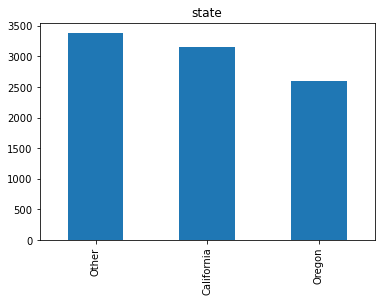

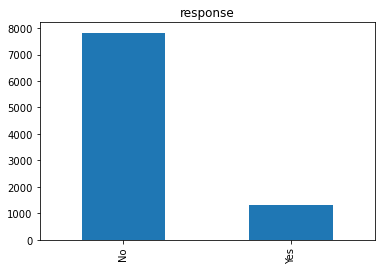

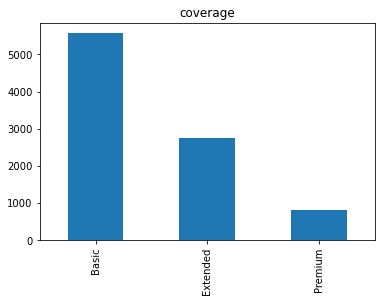

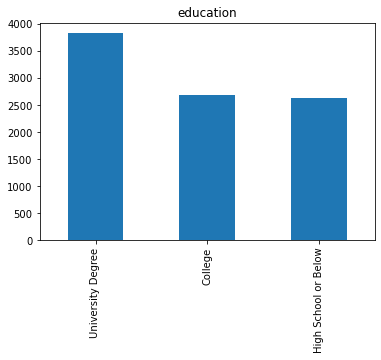

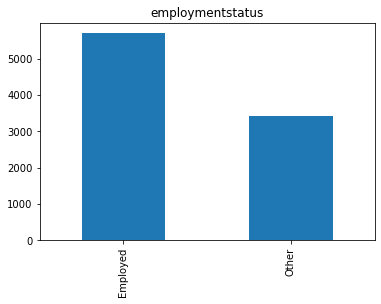

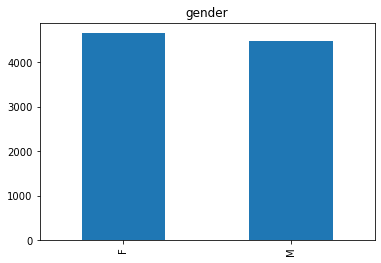

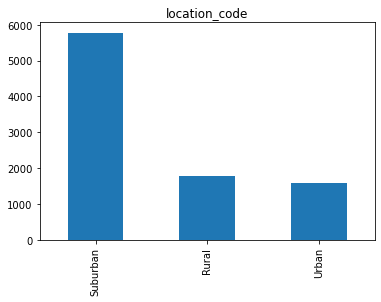

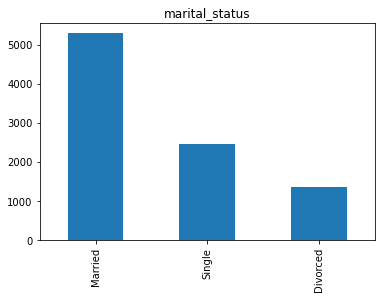

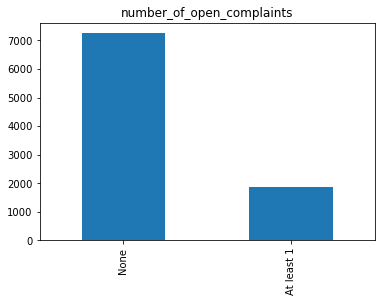

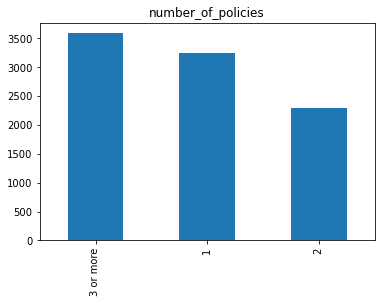

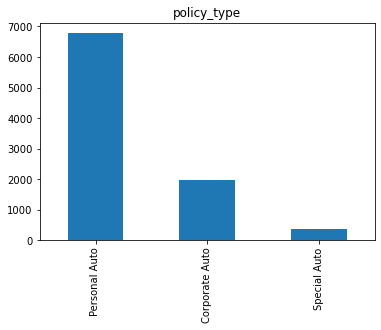

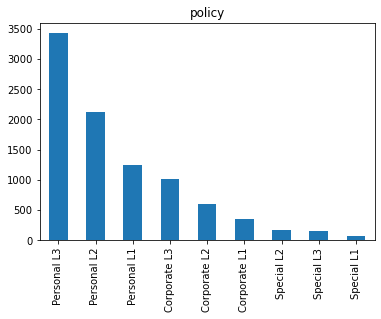

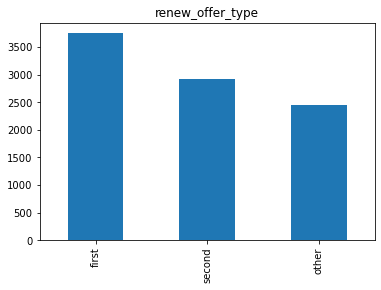

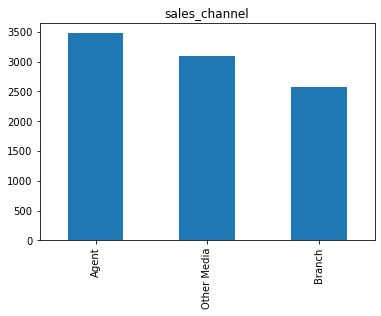

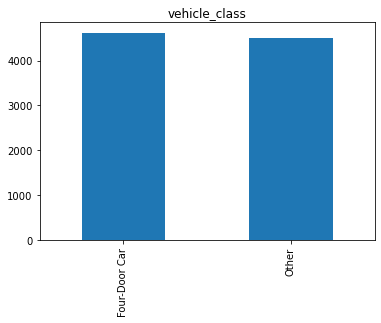

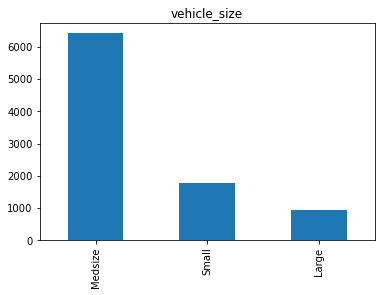

In [38]:
plot_categorical(categorical_df)

- It appears that there are still columns, with significance class imbalance, for example the response, coverage, location code


- For me the redundant columns are: **policy** as policy_type can be kept instead, they basically have the same information but policy is just way more specific, and for the sake of encoding we dont need it to be too specific.
  

In [39]:
#Lets remove the following columns 'policy' as mentioned in previous
#comments
categorical_df.drop(columns=['policy'], inplace=True)

C:\Users\ALP\Anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [40]:
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,number_of_open_complaints,number_of_policies,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Other,No,Basic,University Degree,Employed,F,Suburban,Married,None,1,Corporate Auto,first,Agent,Other,Medsize
1,Other,No,Extended,University Degree,Other,F,Suburban,Single,None,3 or more,Personal Auto,other,Agent,Four-Door Car,Medsize
2,Other,No,Premium,University Degree,Employed,F,Suburban,Married,None,2,Personal Auto,first,Agent,Other,Medsize
3,California,No,Basic,University Degree,Other,M,Suburban,Married,None,3 or more,Corporate Auto,first,Other Media,Other,Medsize
4,Other,No,Basic,University Degree,Employed,M,Rural,Single,None,1,Personal Auto,first,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,University Degree,Employed,M,Urban,Married,None,2,Personal Auto,second,Other Media,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,None,1,Corporate Auto,first,Branch,Four-Door Car,Medsize
9131,California,No,Extended,University Degree,Other,M,Suburban,Single,At least 1,2,Corporate Auto,first,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,None,3 or more,Personal Auto,other,Branch,Four-Door Car,Large


<AxesSubplot:title={'center':'Effective to date'}>

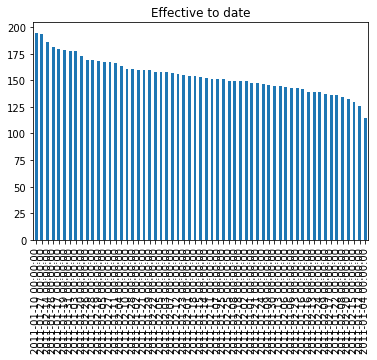

In [41]:
#Plot time variable. Can you extract something from it?
plt.figure()
plt.title('Effective to date')
numerical_df['effective_to_date'].value_counts().plot(kind = 'bar')

From this I can see that all the dates are almost equally spread out in the counts, but not quite. I have kept it the way it is, as I may want to label/ordinal encode the column. 

The other argument is that there are just way too many date values, and i wouldnt make sense to include it into any model. So for this reason I could also choose to drop date. But it all depends on how the model performs with or without it. 

# Lab | Comparing regression models

1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.


2. We will start with removing outliers, if you have not already done so. We have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [42]:
#Before doing train test split, let me join all the columns of numerical and categorical together

data = pd.concat([numerical_df, categorical_df], axis =1)


In [43]:
data.head()

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount,state,response,coverage,...,gender,location_code,marital_status,number_of_open_complaints,number_of_policies,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2763.519279,2011-02-24,56274,69,32,5,384.811147,Other,No,Basic,...,F,Suburban,Married,None,1,Corporate Auto,first,Agent,Other,Medsize
1,6979.535903,2011-01-31,0,94,13,42,1131.464935,Other,No,Extended,...,F,Suburban,Single,None,3 or more,Personal Auto,other,Agent,Four-Door Car,Medsize
2,12887.431650,2011-02-19,48767,108,18,38,566.472247,Other,No,Premium,...,F,Suburban,Married,None,2,Personal Auto,first,Agent,Other,Medsize
3,7645.861827,2011-01-20,0,106,18,65,529.881344,California,No,Basic,...,M,Suburban,Married,None,3 or more,Corporate Auto,first,Other Media,Other,Medsize
4,2813.692575,2011-02-03,43836,73,12,44,138.130879,Other,No,Basic,...,M,Rural,Single,None,1,Personal Auto,first,Agent,Four-Door Car,Medsize


<AxesSubplot:>

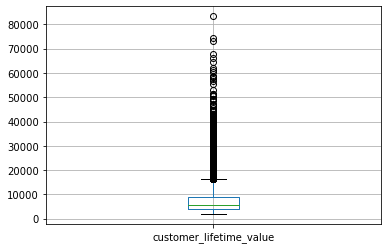

In [44]:
# Before doing any split, I will remove outliers if I find any
#Based on previous labs, I noticed outliers in customer_lifetime_value and total_claim_amount
#As these are highly skewed data, I do not want to remove all the points, just the one s I think are genuine outliers

plt.figure()
data.boxplot(['customer_lifetime_value'])

<AxesSubplot:>

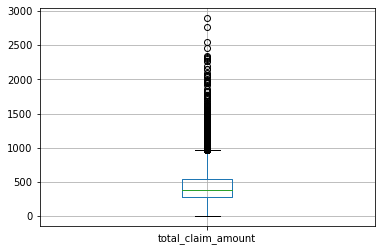

In [45]:
plt.figure()
data.boxplot(['total_claim_amount'])

In [46]:
#Here is a function for cleaning customer_lifetime_value and total_claim_amount of the very few outliers I observed in
#the box plot. Normally I would clean outliers by looking at the upper limit, however these two columns are highly skewed,
#and not all the points are outliers, therefore I do not want to lose that many data points

def outlier_cleaner(df, col, col2):
    df2 = df.copy()
    if col == 'customer_lifetime_value' and col2 == 'total_claim_amount':
        for i in range(3):
            df2 = df2.drop(df2['customer_lifetime_value'].idxmax())
            df2 = df2.drop(df2['total_claim_amount'].idxmax())
    else:
        pass
    
    return df2

In [47]:
data = outlier_cleaner(data,'customer_lifetime_value', 'total_claim_amount')

In [48]:
print(data['customer_lifetime_value'].max())
data['customer_lifetime_value'].idxmax()

67907.2705


7283

In [49]:
print(customer_df['total_claim_amount'].max())
customer_df['total_claim_amount'].idxmax()

2893.239678


888

<AxesSubplot:>

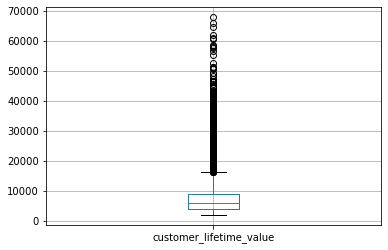

In [50]:
#Looks much better 
plt.figure()
data.boxplot(['customer_lifetime_value'])

<AxesSubplot:>

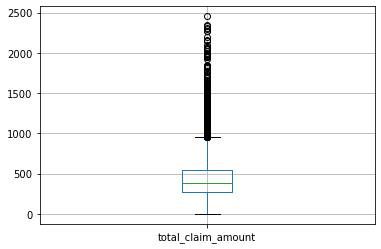

In [51]:
#This looks fine to me now, just highly skewed
plt.figure()
data.boxplot(['total_claim_amount'])

In [52]:
#Next Step I will do the X - y split

X = data.drop('total_claim_amount',axis=1)
y = data[['total_claim_amount']]

In [53]:
display(X.head())
display(y.head())
print(X.shape)
print(y.shape)

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,state,response,coverage,education,...,gender,location_code,marital_status,number_of_open_complaints,number_of_policies,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2763.519279,2011-02-24,56274,69,32,5,Other,No,Basic,University Degree,...,F,Suburban,Married,None,1,Corporate Auto,first,Agent,Other,Medsize
1,6979.535903,2011-01-31,0,94,13,42,Other,No,Extended,University Degree,...,F,Suburban,Single,None,3 or more,Personal Auto,other,Agent,Four-Door Car,Medsize
2,12887.431650,2011-02-19,48767,108,18,38,Other,No,Premium,University Degree,...,F,Suburban,Married,None,2,Personal Auto,first,Agent,Other,Medsize
3,7645.861827,2011-01-20,0,106,18,65,California,No,Basic,University Degree,...,M,Suburban,Married,None,3 or more,Corporate Auto,first,Other Media,Other,Medsize
4,2813.692575,2011-02-03,43836,73,12,44,Other,No,Basic,University Degree,...,M,Rural,Single,None,1,Personal Auto,first,Agent,Four-Door Car,Medsize


,total_claim_amount
0,384.811147
1,1131.464935
2,566.472247
3,529.881344
4,138.130879


(9128, 21)
(9128, 1)


In [54]:
# Here I would like to seperate Effective_to_date into day and month
#I will keep day as numerical and month as a categorical later on
#In addition to that I will drop the effective_to_date column
def seperate_date(df):
    df = df.copy()
    df['month'] = df['effective_to_date'].dt.month
    df['day'] = df['effective_to_date'].dt.day
    df = df.drop('effective_to_date',axis=1)
    return df

In [55]:
X = seperate_date(X)

In [56]:
X['month'] = X.month.astype(object)

In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9128 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9128 non-null   float64
 1   income                         9128 non-null   int64  
 2   monthly_premium_auto           9128 non-null   int64  
 3   months_since_last_claim        9128 non-null   int64  
 4   months_since_policy_inception  9128 non-null   int64  
 5   state                          9128 non-null   object 
 6   response                       9128 non-null   object 
 7   coverage                       9128 non-null   object 
 8   education                      9128 non-null   object 
 9   employmentstatus               9128 non-null   object 
 10  gender                         9128 non-null   object 
 11  location_code                  9128 non-null   object 
 12  marital_status                 9128 non-null   o

In [58]:
#Now time for the test-train split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


**3. Create a copy of the dataframe for the data wrangling.**


In [59]:
#As copies, Here I will split the X train and test sets into numerical and categorical for their specific transformations
#This means the original df will be unaffected
#I can use the same function for this like in the previous labs, for splittiing categorical and numerical

#AND ALSO: day will now be treated as numerical, and month as categorical

def count_disc_splitter(df):
    continuous_list = []
    discrete_list = []
    for col in df:
        if df[col].nunique() > 30 and df[col].dtypes != 'O':#with this condition of != 'O', I am getting rid of customer column
            continuous_list.append(col)
            continuous = df[continuous_list]
        elif df[col].nunique() < 31:
            discrete_list.append(col)
            discrete = df[discrete_list]
        else:
            pass
    return continuous, discrete

In [60]:
num_train, cat_train = count_disc_splitter(X_train)
num_test, cat_test = count_disc_splitter(X_test)

In [61]:
print(num_train.shape)
print(cat_train.shape)
print(num_test.shape)
print(cat_test.shape)

(6389, 6)
(6389, 16)
(2739, 6)
(2739, 16)


**4. Normalize the continuous variables. You can use any one method you want.**

In [62]:
num_test.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,day
4490,13369.442670,50800,112,1,45,9
3792,6451.263836,30857,81,17,14,13
2503,10548.537030,27458,131,18,62,15
2914,8717.049833,83846,74,22,94,14
3162,32467.661510,37675,104,23,18,16


In [63]:
#For the normalization of both numerical train and test sets, I use a function to make things easier
#This functuion makes use of the MinMaxScaler from sklearn for normalization
def min_max(df, df2):
    from sklearn.preprocessing import MinMaxScaler 
    transformer = MinMaxScaler().fit(df) #It is important to make sure it only fits the train set
    
    x_normalized_df = transformer.transform(df)
    x_normalized_df2 = transformer.transform(df2)
    x_normalized_df = pd.DataFrame(x_normalized_df, columns=df.columns)
    x_normalized_df2 = pd.DataFrame(x_normalized_df2, columns=df2.columns)
    return x_normalized_df, x_normalized_df2

In [64]:
num_train_trans, num_test_trans = min_max(num_train, num_test)

In [65]:
#Numerical/Continuous Transformation is done!
display(num_train_trans.head())
display(num_test_trans.head())
print(num_train_trans.shape)
print(num_test_trans.shape)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,day
0,0.048104,0.604386,0.004219,0.285714,0.313131,0.300000
1,0.056961,0.369324,0.063291,0.800000,0.777778,0.700000
2,0.020432,0.401507,0.080169,0.828571,0.707071,0.233333
3,0.056271,0.749892,0.033755,0.314286,0.444444,0.200000
4,0.207275,0.000000,0.042194,0.114286,0.646465,0.366667


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,day
0,0.178875,0.508198,0.215190,0.028571,0.454545,0.266667
1,0.070993,0.308690,0.084388,0.485714,0.141414,0.400000
2,0.134886,0.274687,0.295359,0.514286,0.626263,0.466667
3,0.106326,0.838787,0.054852,0.628571,0.949495,0.433333
4,0.476694,0.376897,0.181435,0.657143,0.181818,0.500000


(6389, 6)
(2739, 6)


In [66]:
#Just checkng for correlation between columns
correlations_matrix = num_train_trans.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,day
customer_lifetime_value,1.000000,0.018942,0.406835,0.009415,0.012316,-0.003428
income,0.018942,1.000000,-0.020593,-0.027744,0.008159,-0.025679
monthly_premium_auto,0.406835,-0.020593,1.000000,0.009799,0.020952,-0.017877
months_since_last_claim,0.009415,-0.027744,0.009799,1.000000,-0.049810,0.020913
months_since_policy_inception,0.012316,0.008159,0.020952,-0.049810,1.000000,-0.024003
day,-0.003428,-0.025679,-0.017877,0.020913,-0.024003,1.000000


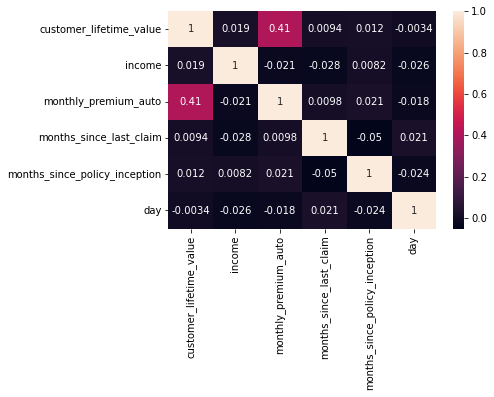

In [67]:
#Looks likes know strong correlations from the correlation matrix
sns.heatmap(correlations_matrix, annot=True) 
plt.show()

**5. Encode the categorical variables (See the hint below for encoding categorical data!!!)**


**6. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.**
Answer: For this one I decided to go for day as a numerical feature, and month as a categorical feature. 

**7. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.**


In [68]:
#For encoding its better to seperate the categorical data in to categorical ordinal and categorical nominal
cat_train

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,number_of_open_complaints,number_of_policies,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month
1413,Oregon,No,Basic,University Degree,Employed,F,Rural,Divorced,None,3 or more,Personal Auto,second,Branch,Other,Small,1
9105,California,No,Extended,College,Employed,M,Suburban,Divorced,At least 1,3 or more,Personal Auto,first,Branch,Other,Medsize,2
5324,Other,No,Extended,University Degree,Employed,F,Rural,Married,None,1,Personal Auto,first,Agent,Four-Door Car,Medsize,2
4143,Other,No,Basic,University Degree,Employed,M,Rural,Single,At least 1,3 or more,Corporate Auto,first,Other Media,Four-Door Car,Medsize,2
4699,California,No,Basic,High School or Below,Other,M,Suburban,Single,At least 1,2,Personal Auto,second,Other Media,Four-Door Car,Small,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,California,No,Premium,College,Other,F,Rural,Married,At least 1,3 or more,Personal Auto,first,Agent,Four-Door Car,Medsize,1
79,California,No,Basic,University Degree,Employed,M,Rural,Single,At least 1,2,Personal Auto,second,Branch,Other,Small,2
8045,California,No,Extended,University Degree,Employed,F,Rural,Married,At least 1,3 or more,Personal Auto,other,Agent,Four-Door Car,Large,2
6942,Other,No,Basic,University Degree,Employed,F,Urban,Married,At least 1,3 or more,Personal Auto,second,Branch,Four-Door Car,Medsize,2


In [69]:
#Now seperating into nominal as cat_train_nom and ordinal as cat_train_ord
#Likewise for the test data
cat_train_nom = cat_train[['state', 'response','gender', 'marital_status','policy_type', 'renew_offer_type', 'sales_channel', 'vehicle_class']]
cat_train_ord = cat_train[['coverage','education', 'employmentstatus','location_code','number_of_open_complaints', 'number_of_policies', 'vehicle_size', 'month']]

cat_test_nom = cat_test[['state', 'response','gender', 'marital_status','policy_type', 'renew_offer_type', 'sales_channel', 'vehicle_class']] 
cat_test_ord = cat_test[['coverage','education', 'employmentstatus','location_code','number_of_open_complaints', 'number_of_policies', 'vehicle_size', 'month']]

In [70]:
cat_train_nom

,state,response,gender,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class
1413,Oregon,No,F,Divorced,Personal Auto,second,Branch,Other
9105,California,No,M,Divorced,Personal Auto,first,Branch,Other
5324,Other,No,F,Married,Personal Auto,first,Agent,Four-Door Car
4143,Other,No,M,Single,Corporate Auto,first,Other Media,Four-Door Car
4699,California,No,M,Single,Personal Auto,second,Other Media,Four-Door Car
...,...,...,...,...,...,...,...,...
350,California,No,F,Married,Personal Auto,first,Agent,Four-Door Car
79,California,No,M,Single,Personal Auto,second,Branch,Other
8045,California,No,F,Married,Personal Auto,other,Agent,Four-Door Car
6942,Other,No,F,Married,Personal Auto,second,Branch,Four-Door Car


In [71]:
#Now we can do OneHotEncoding on the nominals. Lets go

#Now we work on the categorical data
#I will us a onehotencoder on the Senior Citizen train and test set
#first on the train set
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first') #important to drop first, as you already know what the other column will be
encoder.fit(cat_train_nom)
cat_train_nom_encoded = encoder.transform(cat_train_nom).toarray()
cols = encoder.get_feature_names(input_features=cat_train_nom.columns)
cat_train_nom_encoded = pd.DataFrame(cat_train_nom_encoded, columns=cols)
cat_train_nom_encoded.head()

C:\Users\ALP\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,state_Oregon,state_Other,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_other,renew_offer_type_second,sales_channel_Branch,sales_channel_Other Media,vehicle_class_Other
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [72]:
#Similarly lets one hot encode the test set
cat_test_nom_encoded = encoder.transform(cat_test_nom).toarray()
cols = encoder.get_feature_names(input_features=cat_train_nom.columns)
cat_test_nom_encoded = pd.DataFrame(cat_test_nom_encoded, columns=cols)
cat_test_nom_encoded.head()

C:\Users\ALP\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,state_Oregon,state_Other,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_other,renew_offer_type_second,sales_channel_Branch,sales_channel_Other Media,vehicle_class_Other
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [73]:
#Now lets label/Ordinal Encode the categorical ordinal data
cat_train_ord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6389 entries, 1413 to 5644
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   coverage                   6389 non-null   object
 1   education                  6389 non-null   object
 2   employmentstatus           6389 non-null   object
 3   location_code              6389 non-null   object
 4   number_of_open_complaints  6389 non-null   object
 5   number_of_policies         6389 non-null   object
 6   vehicle_size               6389 non-null   object
 7   month                      6389 non-null   object
dtypes: object(8)
memory usage: 449.2+ KB


In [74]:
#Dealing with my Ordinal Categorical data
#Using Ordinal Encoder
#Here I make the order of the values I want when using the Ordinal Encoder

coverage_order = ['Basic', 'Extended', 'Premium']
education_order = ['High School or Below', 'College', 'University Degree']
employmentstatus_order = ['Employed', 'Other']
location_code_order = ['Urban', 'Suburban', 'Rural']
num_complaints_order = ['None', 'At least 1']
num_policies_order = [1, 2, '3 or more']
vehicle_size_order = ['Small', 'Medsize', 'Large']
month_order = [1 , 2]

In [75]:
#These are for the column names of the to be encoded df
cols = list(cat_train_ord.columns)
cols

['coverage',
 'education',
 'employmentstatus',
 'location_code',
 'number_of_open_complaints',
 'number_of_policies',
 'vehicle_size',
 'month']

In [76]:
from sklearn.preprocessing import OrdinalEncoder
ordi = OrdinalEncoder(categories = [coverage_order, education_order, employmentstatus_order, location_code_order, num_complaints_order, num_policies_order, vehicle_size_order, month_order]).fit(cat_train_ord[['coverage', 'education', 'employmentstatus', 'location_code', 'number_of_open_complaints', 'number_of_policies', 'vehicle_size', 'month']])
print(ordi)
cat_train_ord_encoded = ordi.transform(cat_train_ord[['coverage', 'education', 'employmentstatus', 'location_code', 'number_of_open_complaints', 'number_of_policies', 'vehicle_size', 'month']])
cat_train_ord_encoded = pd.DataFrame(cat_train_ord_encoded, columns= cols)
cat_train_ord_encoded

OrdinalEncoder(categories=[['Basic', 'Extended', 'Premium'],
                           ['High School or Below', 'College',
                            'University Degree'],
                           ['Employed', 'Other'],
                           ['Urban', 'Suburban', 'Rural'],
                           ['None', 'At least 1'], [1, 2, '3 or more'],
                           ['Small', 'Medsize', 'Large'], [1, 2]])


,coverage,education,employmentstatus,location_code,number_of_open_complaints,number_of_policies,vehicle_size,month
0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0
1,1.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0
2,1.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0
3,0.0,2.0,0.0,2.0,1.0,2.0,1.0,1.0
4,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
6384,2.0,1.0,1.0,2.0,1.0,2.0,1.0,0.0
6385,0.0,2.0,0.0,2.0,1.0,1.0,0.0,1.0
6386,1.0,2.0,0.0,2.0,1.0,2.0,2.0,1.0
6387,0.0,2.0,0.0,0.0,1.0,2.0,1.0,1.0


In [77]:
cat_test_ord_encoded = ordi.transform(cat_test_ord[['coverage', 'education', 'employmentstatus', 'location_code', 'number_of_open_complaints', 'number_of_policies', 'vehicle_size', 'month']])
cat_test_ord_encoded = pd.DataFrame(cat_test_ord_encoded, columns= cols)
cat_test_ord_encoded

,coverage,education,employmentstatus,location_code,number_of_open_complaints,number_of_policies,vehicle_size,month
0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1,1.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0
2,1.0,2.0,0.0,1.0,1.0,2.0,1.0,0.0
3,0.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0
4,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
2734,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0
2735,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0
2736,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2737,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0


**Now its time to gather all the transformed/encoded data together into one df !!!!**

In [78]:
#Firts lets gather all the categorical together 

cat_train_encoded = pd.concat([cat_train_nom_encoded, cat_train_ord_encoded], axis = 1)
cat_test_encoded = pd.concat([cat_test_nom_encoded, cat_test_ord_encoded], axis = 1)

In [79]:
display(cat_train_encoded.head())
display(cat_test_encoded.head())

,state_Oregon,state_Other,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_other,renew_offer_type_second,...,sales_channel_Other Media,vehicle_class_Other,coverage,education,employmentstatus,location_code,number_of_open_complaints,number_of_policies,vehicle_size,month
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,0.0,2.0,1.0,2.0,1.0,1.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0


,state_Oregon,state_Other,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_other,renew_offer_type_second,...,sales_channel_Other Media,vehicle_class_Other,coverage,education,employmentstatus,location_code,number_of_open_complaints,number_of_policies,vehicle_size,month
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,2.0,0.0,1.0,1.0,2.0,1.0,0.0
3,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0


In [80]:
#Okay now lets combine numerical and categorical test-train into two seperate dfs
#X_train_trans, X_test_trans
X_train_trans = pd.concat([num_train_trans, cat_train_encoded], axis = 1) 
X_test_trans = pd.concat([num_test_trans, cat_test_encoded], axis = 1) 

In [81]:
display(X_train_trans.head())
display(X_test_trans.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,day,state_Oregon,state_Other,response_Yes,gender_M,...,sales_channel_Other Media,vehicle_class_Other,coverage,education,employmentstatus,location_code,number_of_open_complaints,number_of_policies,vehicle_size,month
0,0.048104,0.604386,0.004219,0.285714,0.313131,0.300000,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0
1,0.056961,0.369324,0.063291,0.800000,0.777778,0.700000,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0
2,0.020432,0.401507,0.080169,0.828571,0.707071,0.233333,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0
3,0.056271,0.749892,0.033755,0.314286,0.444444,0.200000,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,2.0,0.0,2.0,1.0,2.0,1.0,1.0
4,0.207275,0.000000,0.042194,0.114286,0.646465,0.366667,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,day,state_Oregon,state_Other,response_Yes,gender_M,...,sales_channel_Other Media,vehicle_class_Other,coverage,education,employmentstatus,location_code,number_of_open_complaints,number_of_policies,vehicle_size,month
0,0.178875,0.508198,0.215190,0.028571,0.454545,0.266667,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1,0.070993,0.308690,0.084388,0.485714,0.141414,0.400000,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0
2,0.134886,0.274687,0.295359,0.514286,0.626263,0.466667,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,2.0,0.0,1.0,1.0,2.0,1.0,0.0
3,0.106326,0.838787,0.054852,0.628571,0.949495,0.433333,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0
4,0.476694,0.376897,0.181435,0.657143,0.181818,0.500000,0.0,1.0,0.0,1.0,...,0.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0


**8. Try a simple linear regression with all the data to see whether we are getting good results.**

In [82]:
#First time I'm trying without transforming the target variable. Lets see what results we obtain from the errror metrics.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
lm = LinearRegression()
lm.fit(X_train_trans,y_train)
y_pred_train = lm.predict(X_train_trans)

In [83]:
#R2 score
print("The R2 score for train set is:", r2_score(y_train, y_pred_train))
#MAE ON train data 
mae_train = mean_absolute_error(y_train, y_pred_train)
print("The Mean Absolute Error for train set is:", mae_train)
#MSE on train data
mse = mean_squared_error(y_train, y_pred_train)
print("The Mean Squared Error for train set is:", mse)
#RMSE on train data
import math
rmse = math.sqrt(mse)
print("The RMSE for train set is:", rmse)

The R2 score for train set is: 0.6274548303097163
The Mean Absolute Error for train set is: 127.83034012010344
The Mean Squared Error for train set is: 30479.390351709222
The RMSE for train set is: 174.58347674310195


In [84]:
y_pred_test = lm.predict(X_test_trans)

#R2 score
print("The R2 score for test set is:", r2_score(y_test, y_pred_test))
#MAE ON train data 
mae_test = mean_absolute_error(y_test, y_pred_test)
print("The Mean Absolute Error for test set is:", mae_test)
#MSE on train data
mse_test = mean_squared_error(y_test, y_pred_test)
print("The Mean Squared Error for test set is:", mse_test)
#RMSE on train data
import math
rmse_test = math.sqrt(mse_test)
print("The RMSE for test set is:", rmse_test)

The R2 score for test set is: 0.6100278867374673
The Mean Absolute Error for test set is: 132.46789556294894
The Mean Squared Error for test set is: 32685.825072046602
The RMSE for test set is: 180.7922151865135


In [85]:
#I see that it does not provide the best R2 score. Now lets transform the target variable, and see what we obtain#

In [86]:
#Plotting the distribution of the target variable, I noticed that it is right skewed. Hence its better to carry out
#a log transformation

#fig, ax = plt.subplots()
#sns.distplot(y_train,  color="g", ax=ax)
#plt.show()

In [87]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(y_train) #It is important to make sure it only fits the train set
y_train_normalized = transformer.transform(y_train)
y_train_normalized = pd.DataFrame(y_train_normalized, columns=y_train.columns)
y_test_normalized = transformer.transform(y_test)
y_test_normalized = pd.DataFrame(y_test_normalized, columns=y_train.columns)

In [88]:
lm = LinearRegression()
lm.fit(X_train_trans,y_train_normalized)
y_pred_train = lm.predict(X_train_trans)

In [89]:
#R2 score
print("The R2 score for train set norm is:", r2_score(y_train_normalized, y_pred_train))
#MAE ON train data 
mae_train_norm = mean_absolute_error(y_train_normalized, y_pred_train)
print("The Mean Absolute Error for train set norm is:", mae_train_norm)
#MSE on train data
mse_train_norm = mean_squared_error(y_train_normalized, y_pred_train)
print("The Mean Squared Error for train set norm is:", mse_train_norm)
#RMSE on train data
import math
rmse_train_norm = math.sqrt(mse_train_norm)
print("The RMSE for train set norm is:", rmse_train_norm)

The R2 score for train set norm is: 0.6274548303097163
The Mean Absolute Error for train set norm is: 0.052116188562942665
The Mean Squared Error for train set norm is: 0.005066215748331489
The RMSE for train set norm is: 0.07117735418187085


In [90]:
y_pred_test = lm.predict(X_test_trans)

#R2 score
print("The R2 score for test set norm is:", r2_score(y_test_normalized, y_pred_test))
#MAE ON train data 
mae_test_norm = mean_absolute_error(y_test_normalized, y_pred_test)
print("The Mean Absolute Error for test set norm is:", mae_test_norm)
#MSE on train data
mse_test_norm = mean_squared_error(y_test_normalized, y_pred_test)
print("The Mean Squared Error for test set norm is:", mse_test_norm)
#RMSE on train data
import math
rmse_test_norm = math.sqrt(mse_test_norm)
print("The RMSE for test set norm is:", rmse_test_norm)

The R2 score for test set norm is: 0.6100278867374673
The Mean Absolute Error for test set norm is: 0.05400691116998067
The Mean Squared Error for test set norm is: 0.005432964367606668
The RMSE for test set norm is: 0.0737086451347918


In [ ]:
#R2 stays the same, but other error metrics Looks much better when the target variable is normalized

**9. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.**


**10.Use the function to check LinearRegressor and KNeighborsRegressor.**


**11.You can check also the MLPRegressor for this task!**


**12. Check and discuss the results**

In [ ]:
def Model_try_and_test(df, typ = LinearRegression(), disp_metrics = False): 
    # X-Y Split 
    X,y_exp = functions.xy_split(data_copy)
    
    # We use the log(y)
    y = np.log(y_exp)

    # Train and test split
    X_train, X_test, y_train, y_test = functions.tr_ts_split(X,y)

    # Train
    X_train_tr, num_tr, cat_enc, minmax_tr = functions.Model_train(X_train)

    # And test
    X_test_tr = functions.Model_transform(X_test,num_tr,cat_enc,minmax_tr)
    
    # We do the regrresion
    typ.fit(X_train_tr, y_train)
    y_pred_train = typ.predict(X_train_tr)
    y_pred_test = typ.predict(X_test_tr)
    
    # Show the results
    if disp_metrics == True:
        display(metrics_jor.MetricsResults(y_train, y_pred_train,y_test,y_pred_test))

    return typ.score(X_test_tr, y_test), typ

In [124]:
def diff_models(X_train, y_train, X_test, y_test, model='Linear'):
    if model == 'Linear':
        from sklearn.linear_model import LinearRegression
        from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
        lm = LinearRegression()
        lm.fit(X_train,y_train)
        y_pred_train = lm.predict(X_train)
        r2_train = ("The R2 score for train set is",r2_score(y_train, y_pred_train))
        mae_train = ("The Mean Absolute Error for train set is:", mean_absolute_error(y_train, y_pred_train))
        mse_train = ("The Mean Squared Error for train set is:", mean_squared_error(y_train, y_pred_train))
        rmse_train = ("The RMSE for train set is:",mean_squared_error(y_train, y_pred_train, squared=False))
        y_pred_test = lm.predict(X_test)
        r2_test = ("The R2 score for test set is", r2_score(y_test, y_pred_test))
        mae_test = ("The Mean Absolute Error for test set is:", mean_absolute_error(y_test, y_pred_test))
        mse_test = ("The Mean Squared Error for test set is:", mean_squared_error(y_test, y_pred_test))
        rmse_test = ("The RMSE for test set is:",mean_squared_error(y_test, y_pred_test, squared=False))
        return r2_train, mae_train, mse_train, rmse_train, r2_test,mae_test,mse_test,rmse_test
    elif model == 'KNN':
        from sklearn.neighbors import KNeighborsRegressor
        knn = KNeighborsRegressor(n_neighbors=5)
        knn.fit(X_train, y_train)
        knn_score = knn.score(X_test, y_test)
        return print("The R2 of the k-NN model is {:.2f}".format(knn_score))
    elif model == 'MLP':
        from sklearn.neural_network import MLPRegressor
        regr = MLPRegressor(random_state=1, max_iter=10).fit(X_train, y_train)
        regr.predict(X_test)
        return print("the coefficient of determination of the prediction", regr.score(X_test_trans, y_test_normalized))    
    else:
        pass

In [126]:
diff_models(X_train_trans, y_train_normalized, X_test_trans, y_test_normalized, model='Linear')

(('The R2 score for train set is', 0.6274548303097163),
 ('The Mean Absolute Error for train set is:', 0.052116188562942665),
 ('The Mean Squared Error for train set is:', 0.005066215748331489),
 ('The RMSE for train set is:', 0.07117735418187085),
 ('The R2 score for test set is', 0.6100278867374673),
 ('The Mean Absolute Error for test set is:', 0.05400691116998067),
 ('The Mean Squared Error for test set is:', 0.005432964367606668),
 ('The RMSE for test set is:', 0.0737086451347918))

In [127]:
diff_models(X_train_trans, y_train_normalized, X_test_trans, y_test_normalized, model='KNN')


The R2 of the k-NN model is 0.53


In [128]:
diff_models(X_train_trans, y_train_normalized, X_test_trans, y_test_normalized, model='MLP')

C:\Users\ALP\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


the coefficient of determination of the prediction 0.5051935512163346


C:\Users\ALP\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


**BASED on the above results, I notice that from the parameters I've set that the linear regression model is the best performing model of the three, based on the error metrics. The R2 score was not the best, but still performed better than the other models. Of course to improve the model perhaps a lot of further work would need to be done to the columns, and some might need to even be droppe.
The scores of the K-NN model were quite low and so were that of the MLP model.**